In [146]:
# Import Modules
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
from math import log10, floor

plt.style.use("seaborn") # Pretty graphs

In [147]:
# Round to specified number of significant digits
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [148]:
df = pd.read_csv("../data/g_radii_nmin100_nmax5000000.csv", delimiter = ",", header = None)

df.columns = ["Particles", "Runtime", "Gyration Radius", "Seeds", "D Max"]

# Split dataframe by d_max
df_50 = df[df["D Max"] == 50]
df_90 = df[df["D Max"] == 90]
df_140 = df[df["D Max"] == 140]
df_200 = df[df["D Max"] == 200]

In [149]:
def plot_radii(df, ax):
    # Parse columns from file
    n = np.log(df["Particles"])
    r = np.log(df["Gyration Radius"])
    d_max = int(df["D Max"].head(1))

    ax.scatter(n, r) #, label = r"$d_{max}$ = " + str(d_max))

def plot_runtime(df, ax):
    # Parse columns from file
    n = np.log(df["Particles"])
    t = np.log(df["Runtime"])
    d_max = int(df["D Max"].head(1))

    n_mod = sm.add_constant(data = n)
    model = sm.OLS(t, n_mod)
    results = model.fit()
    params = results.params
    bse = results.bse

    grad = params[1]
    y_int = params[0]

    t_fit = grad * n + y_int

    grad_err = bse[1]
    grad_err = round_sig(grad_err/grad**2, 1)
    grad_dec = str(grad_err)[::-1].find(".")
    grad = np.round(grad, grad_dec)

    

    ax.scatter(n, t, label = r"$d_{max}$ = " + str(d_max) + "; " + r"$d_f =$" + str(grad) + r"$\pm$" + str(grad_err), zorder = 2)
    ax.plot(n, t_fit, linestyle = "--", zorder = 1, alpha = 0.5)
    

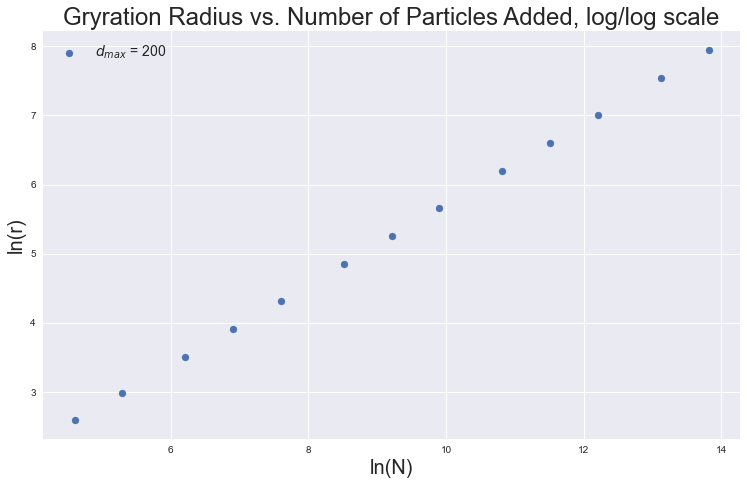

In [155]:
# Create figure for raw data (gyration radius)
fig = plt.figure(1)
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)


ax.set_title("Gryration Radius vs. Number of Particles Added, log/log scale", fontsize=24)
ax.set_xlabel("ln(N)", fontsize=20)
ax.set_ylabel("ln(r)", fontsize=20)


# for df in [df_50, df_90, df_140, df_200]:
    # plot_radii(df = df, ax = ax)

plot_radii(df = df, ax = ax)


ax.legend(fontsize = 14)

plt.show()

C:\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


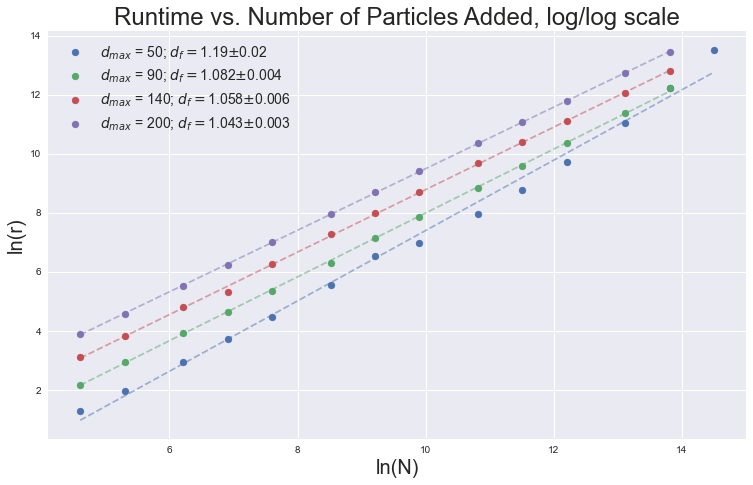

In [154]:
# Create figure for raw data (gyration radius)
fig = plt.figure(1)
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)


ax.set_title("Runtime vs. Number of Particles Added, log/log scale", fontsize=24)
ax.set_xlabel("ln(N)", fontsize=20)
ax.set_ylabel("ln(r)", fontsize=20)


for df in [df_50, df_90, df_140, df_200]:
    plot_runtime(df = df, ax = ax)

ax.legend(fontsize = 14)

plt.show()